Anonymized Adult Test Dataset
=======================================================

Imports & Warnings:

In [41]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# turn of warnings
import warnings
warnings.filterwarnings('ignore')

Loading test datasets:

In [42]:
adult_test_data = pandas.read_csv('Anonymized/anonymized_adult_test_data.csv', index_col= False);
display(adult_test_data.head())

,Age,Workclass,fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Ethnicity,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,50k
0,"[20, 40[",Federal-gov,205737.0,"{9th, 10th, 11th, 12th, HS-grad}","[1, 17[","{Divorced, Widowed, Never-married}",Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
1,"[20, 40[",Federal-gov,334291.0,"{9th, 10th, 11th, 12th, HS-grad}","[1, 17[","{Divorced, Widowed, Never-married}",Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
2,"[20, 40[",Federal-gov,138162.0,"{9th, 10th, 11th, 12th, HS-grad}","[1, 17[","{Divorced, Widowed, Never-married}",Adm-clerical,Unmarried,Black,Female,0.0,0.0,45.0,United-States,<=50K
3,"[40, 60[",Federal-gov,186934.0,"{9th, 10th, 11th, 12th, HS-grad}","[1, 17[","{Divorced, Widowed, Never-married}",Adm-clerical,Unmarried,Black,Female,0.0,0.0,50.0,United-States,<=50K
4,"[40, 60[",Federal-gov,116219.0,"{9th, 10th, 11th, 12th, HS-grad}","[1, 17[","{Divorced, Widowed, Never-married}",Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K


## Data Types

The anonymization changed some continuous attributes to categorical. Types need to be checked and transformed again.

In [43]:
CATEGORICAL_ATTRIBUTES= np.array(['Age', 'Workclass', 'Education','Education-number', 'Marital-status', 'Occupation','Relationship','Ethnicity','Sex','Native-country','50k']) 
CONTINUOUS_ATTRIBUTES= np.array(['fnlwgt', 'Capital-gain', 'Capital-loss', 'Hours-per-week']) 
for col in CATEGORICAL_ATTRIBUTES:
   adult_test_data[col]=adult_test_data[col].astype('category')

In [44]:
display(adult_test_data.dtypes)

Age                 category
Workclass           category
fnlwgt               float64
Education           category
Education-number    category
Marital-status      category
Occupation          category
Relationship        category
Ethnicity           category
Sex                 category
Capital-gain         float64
Capital-loss         float64
Hours-per-week       float64
Native-country      category
50k                 category
dtype: object

### Quantity anonymized test dataset

In [45]:
for attribute,value in adult_test_data.iteritems():
   adult_test_data[attribute]= adult_test_data[attribute].replace('*',np.NAN)


In [46]:
display(adult_test_data.isnull().sum())
seriesObj = adult_test_data.apply(lambda x: x.isnull().any(), axis=1)
nanRows = len(seriesObj[seriesObj == True].index)
rows = adult_test_data.shape[0]
print('Rows in total: ', rows)
print('Number of Rows in dataframe which contain NaN in any column : ', nanRows)
print('% nan :', (nanRows/rows)*100)

Age                 2946
Workclass           2946
fnlwgt                 0
Education           2946
Education-number    2946
Marital-status      2946
Occupation          2946
Relationship        2946
Ethnicity           2946
Sex                 2946
Capital-gain           0
Capital-loss           0
Hours-per-week         0
Native-country         0
50k                    0
dtype: int64

Rows in total:  15076
Number of Rows in dataframe which contain NaN in any column :  2946
% nan : 19.54099230565137


During the anonymization process a supression limt of 20% were configured to eliminate outliers.
19.5% were elimanted and the rows were marked with '\*'. After replacing the character witn numpy.NAN the affected rows will be deleted.

In [47]:
adult_test_data=adult_test_data.dropna()
rows = adult_test_data.shape[0]
print('Rows in total: ', rows)

Rows in total:  12130


## Anonymized Test Dataset Description

             fnlwgt  Capital-gain  Capital-loss  Hours-per-week
count  1.213000e+04   12130.00000  12130.000000    12130.000000
mean   1.890021e+05    1056.75573     90.099423       40.324732
std    1.064954e+05    7505.15886    409.046214       12.438361
min    1.349200e+04       0.00000      0.000000        1.000000
25%    1.156840e+05       0.00000      0.000000       40.000000
50%    1.775360e+05       0.00000      0.000000       40.000000
75%    2.382315e+05       0.00000      0.000000       45.000000
max    1.490400e+06   99999.00000   3770.000000       99.000000


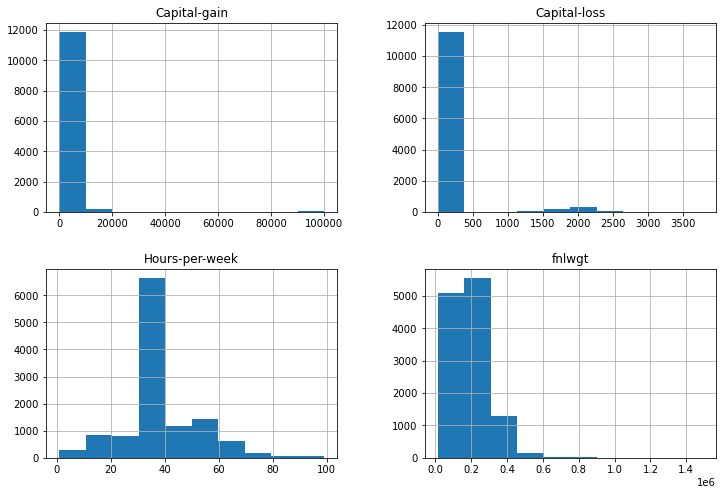

In [48]:
print(adult_test_data.describe());
fig = adult_test_data.hist(column=CONTINUOUS_ATTRIBUTES, figsize=(12,8))

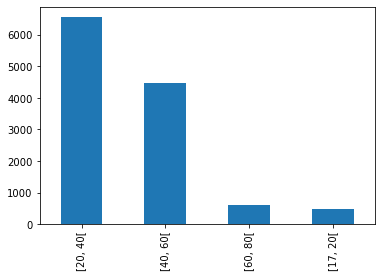

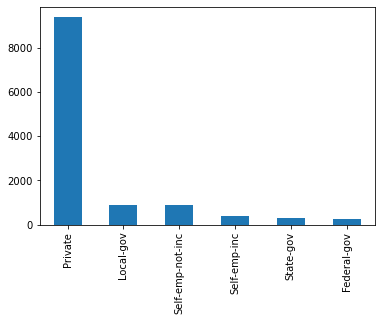

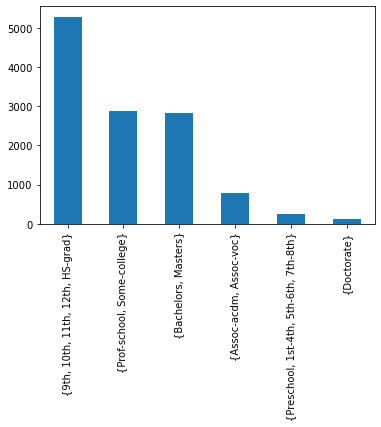

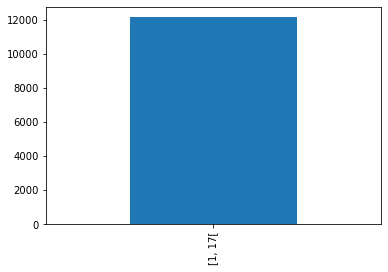

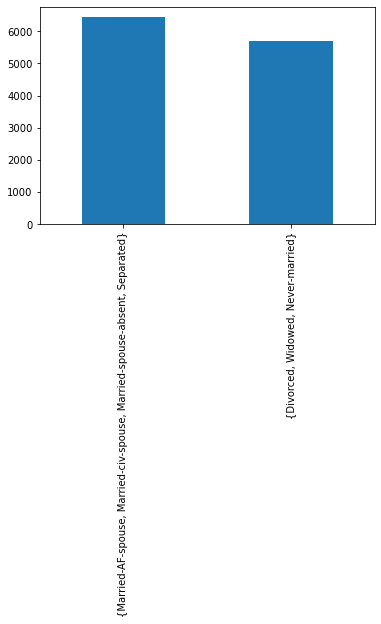

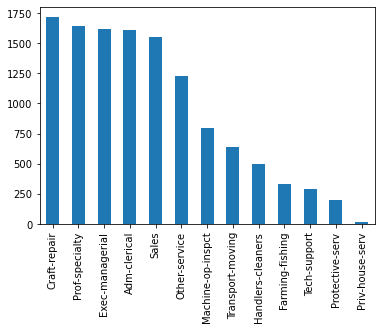

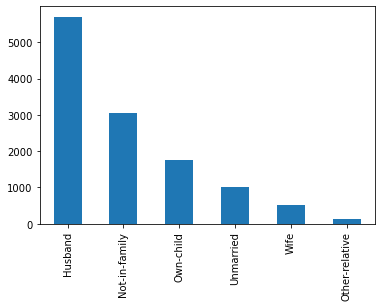

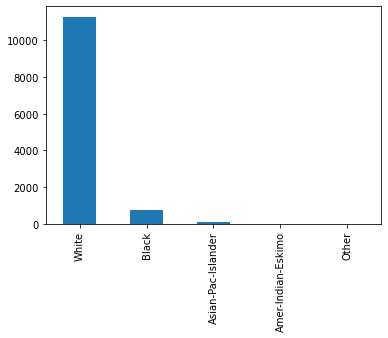

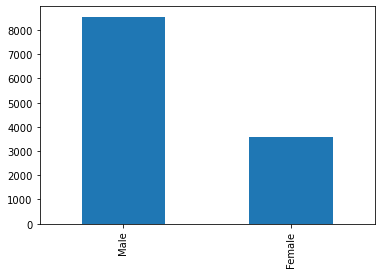

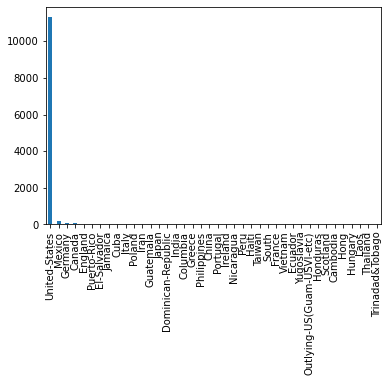

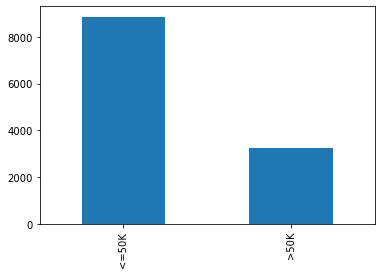

In [49]:
for cat in CATEGORICAL_ATTRIBUTES:
    fig, ax = plt.subplots()
    adult_test_data[cat].value_counts().plot(ax=ax, kind='bar')